In [1]:
import scanpy as sc
from perturbench.data.datasplitter import PerturbationDataSplitter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
norman = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/norman.h5ad')


In [4]:
norman.obs

,condition,cell_type,dose_val,control,condition_name
cell_barcode,,,,,
AAACCTGAGGCATGTG-1,TSC22D1+ctrl,A549,1+1,0,A549_TSC22D1+ctrl_1+1
AAACCTGAGGCCCTTG-1,KLF1+MAP2K6,A549,1+1,0,A549_KLF1+MAP2K6_1+1
AAACCTGCACGAAGCA-1,ctrl,A549,1,1,A549_ctrl_1
AAACCTGCAGACGTAG-1,CEBPE+RUNX1T1,A549,1+1,0,A549_CEBPE+RUNX1T1_1+1
AAACCTGCAGCCTTGG-1,MAML2+ctrl,A549,1+1,0,A549_MAML2+ctrl_1+1
...,...,...,...,...,...
TTTGTCAGTCATGCAT-8,RHOXF2BB+SET,A549,1+1,0,A549_RHOXF2BB+SET_1+1
TTTGTCATCAGTACGT-8,FOXA3+ctrl,A549,1+1,0,A549_FOXA3+ctrl_1+1
TTTGTCATCCACTCCA-8,CELF2+ctrl,A549,1+1,0,A549_CELF2+ctrl_1+1


In [10]:
balanced_transfer_splitter = PerturbationDataSplitter(
    norman.obs.copy(),
    perturbation_key='condition',
    covariate_keys=['cell_class'],
    perturbation_control_value='ctrl',
)
balanced_transfer_splitter

In [11]:
seed_id = 1
balanced_transfer_split = balanced_transfer_splitter.split_covariates(
    seed=seed_id, 
    print_split=True, 
    #max_heldout_covariates=3, ## Maximum number of held out covariates (in this case cell types)
    max_heldout_fraction_per_covariate=0.6, ## Maximum fraction of perturbations held out per covariate
    max_heldout_covariates = 3,
    #test_fraction = 0.5,
)

Split summary: 
            train  val  test
('itRSP',)     10    2     2
('ctL6',)       5    4     5
('PT',)         7    4     3
('inhib',)      6    4     4
('NP',)         8    3     3


/gpfs/group/jin/asun/perturbench/src/perturbench/src/perturbench/data/datasplitter.py:340: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for cov_keys, df in self.obs_dataframe.groupby(self.covariate_keys):
/gpfs/group/jin/asun/perturbench/src/perturbench/src/perturbench/data/datasplitter.py:348: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for pert_key, df in self.obs_dataframe.groupby([self.perturbation_key]):


In [13]:
balanced_transfer_splitter.obs_dataframe.groupby(["condition", "transfer_split_seed1", "cell_class"]).size()

/tmp/ipykernel_13227/896209173.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balanced_transfer_splitter.obs_dataframe.groupby(["condition", "transfer_split_seed1", "cell_class"]).size()


condition  transfer_split_seed1  cell_class
ANK3       test                  NP              0
                                 PT              0
                                 ctL6          489
                                 inhib           0
                                 itRSP         283
                                              ... 
ctrl       val                   NP             57
                                 PT             64
                                 ctL6          184
                                 inhib          54
                                 itRSP          86
Length: 180, dtype: int64

In [ ]:

group_merged = balanced_transfer_splitter.obs_dataframe.merge(final_df, how = "left", left_on = ["cell_class2", "condition"], right_on = ["cell", "pert"])
group_merged.index = balanced_transfer_splitter.obs_dataframe.index

group_merged["group"] = group_merged["group"].fillna(group_merged[f'transfer_split_seed{seed_id}'])

In [14]:
count_long = balanced_transfer_splitter.obs_dataframe.groupby(["condition", "transfer_split_seed1", "cell_class"]).size().reset_index(name = "count")


/tmp/ipykernel_13227/2356664566.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_long = balanced_transfer_splitter.obs_dataframe.groupby(["condition", "transfer_split_seed1", "cell_class"]).size().reset_index(name = "count")


In [15]:
count_long

,condition,transfer_split_seed1,cell_class,count
0,ANK3,test,NP,0
1,ANK3,test,PT,0
2,ANK3,test,ctL6,489
3,ANK3,test,inhib,0
4,ANK3,test,itRSP,283
...,...,...,...,...
175,ctrl,val,NP,57
176,ctrl,val,PT,64
177,ctrl,val,ctL6,184
178,ctrl,val,inhib,54


/tmp/ipykernel_13227/3095725223.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_long = balanced_transfer_splitter.obs_dataframe.groupby(["condition", "transfer_split_seed1", "cell_class"]).size().reset_index(name = "count")


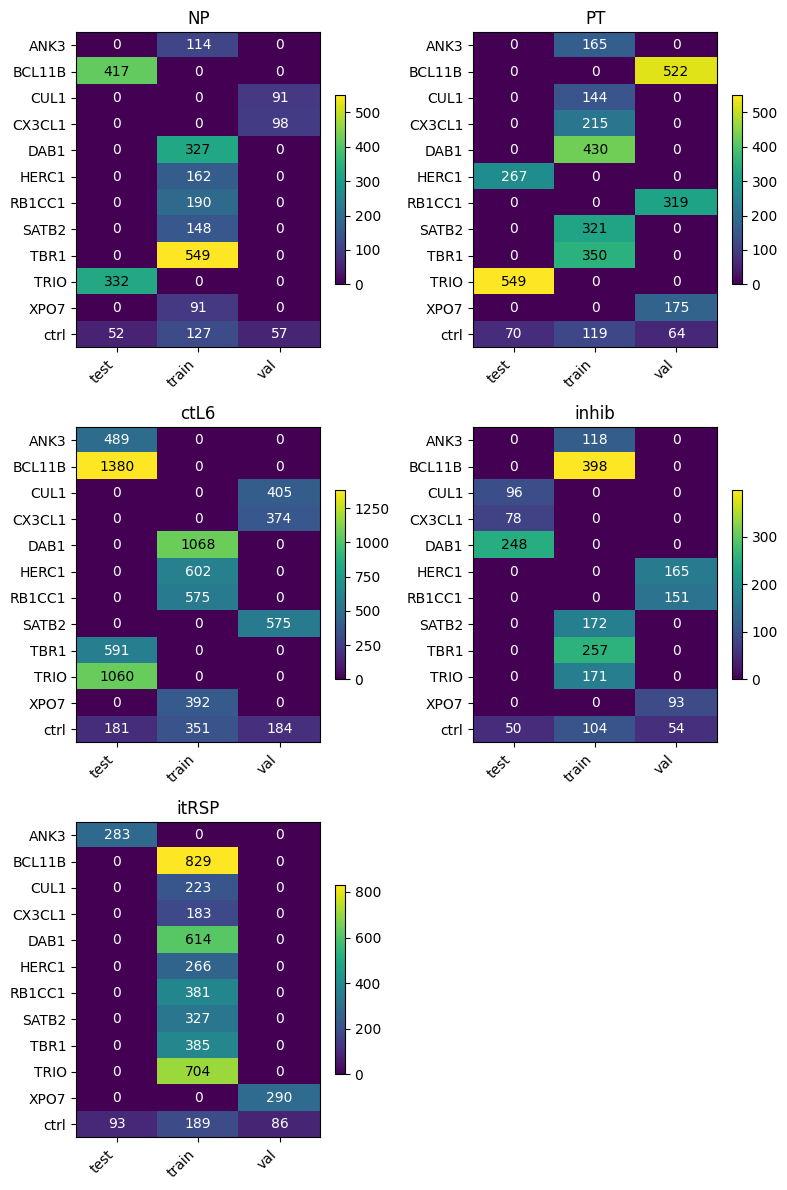

In [21]:
#count_long = balanced_transfer_splitter.obs_dataframe.groupby(["cell_class2", "condition", f"transfer_split_seed{seed_id}"]).size().reset_index(name = "count")
count_long = balanced_transfer_splitter.obs_dataframe.groupby(["condition", "transfer_split_seed1", "cell_class"]).size().reset_index(name = "count")

#cell_counts_all = count_long.pivot(index = ["cell_class2", "condition"], columns = f"transfer_split_seed{seed_id}", values = "count" ).reset_index()
cell_counts_all = count_long.pivot(index = ["cell_class", "condition"], columns = "transfer_split_seed1", values = "count" ).reset_index()

cell_counts_all.columns.name = ""
filtered = cell_counts_all.dropna(axis=0, how="all", subset=cell_counts_all.columns[2:])
cell_classes = filtered["cell_class"].unique()
n_cols = 2
n_rows = (len(cell_classes) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, cell_class in enumerate(cell_classes):
    ax = axes[i]
    subset = filtered[filtered["cell_class"] == cell_class].set_index("condition")
    subset = subset.drop(columns="cell_class")
    subset = subset.fillna(0)
    data = subset.values

    im = ax.imshow(data, aspect="auto", cmap="viridis")
    ax.set_title(cell_class)
    ax.set_xticks(np.arange(subset.shape[1]))
    ax.set_xticklabels(subset.columns, rotation=45, ha="right")
    ax.set_yticks(np.arange(subset.shape[0]))
    ax.set_yticklabels(subset.index)

    for y in range(data.shape[0]):
        for x in range(data.shape[1]):
            value = data[y, x]
            if not np.isnan(value):
                ax.text(x, y, int(value), ha="center", va="center", color="white" if value < data.max() / 2 else "black")

    fig.colorbar(im, ax=ax, shrink=0.6)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()